In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Import Modules**

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')



Loading the Dataset

In [3]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
         print(os.path.join(dirname, filename))

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_dodge_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_void_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_sheep_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set d

In [4]:
path=[]
labels=[]

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path.append(os.path.join(dirname, filename))
        label=filename.split('_')[-1]
        label=label.split('.')[0]
        labels.append(label.lower())
    print('dataset is loaded')

dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded


In [5]:
len(path)

5600

In [6]:
path[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

In [7]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

Creating a Dataframe

In [8]:
df=pd.DataFrame()
df['speech']= path
df['label']= labels
df.head()

,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [9]:
value_counts = df['label'].value_counts()
value_counts

label
fear       800
angry      800
disgust    800
neutral    800
sad        800
ps         800
happy      800
Name: count, dtype: int64

**Explratory Data Analysis**

<Axes: xlabel='label'>

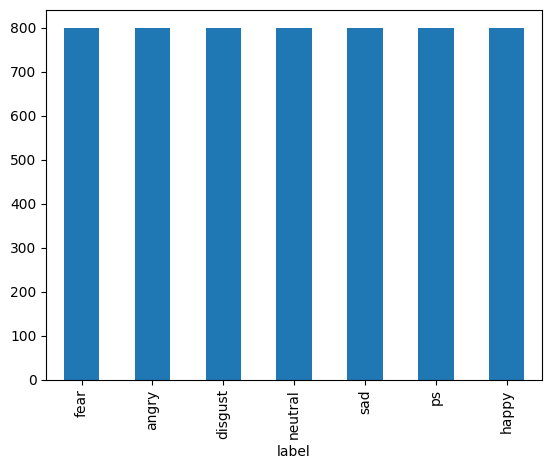

In [10]:
value_counts.plot(kind='bar')


<Axes: xlabel='label'>

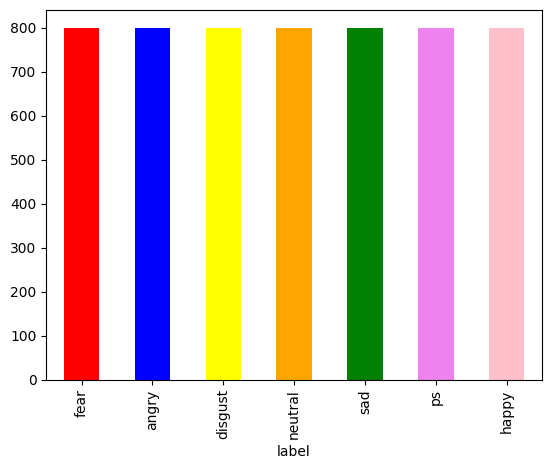

In [11]:
value_counts.plot(kind='bar', color=['red', 'blue', 'yellow','orange','green','violet','pink'])


Pre Processing

**Virtual Representation**

dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded
dataset is loaded


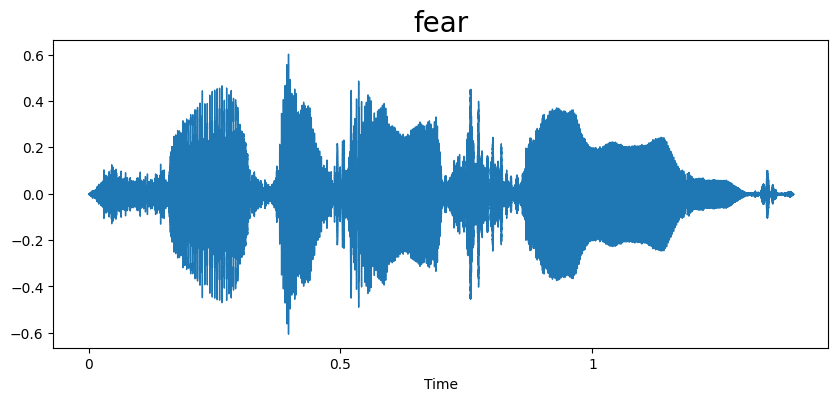

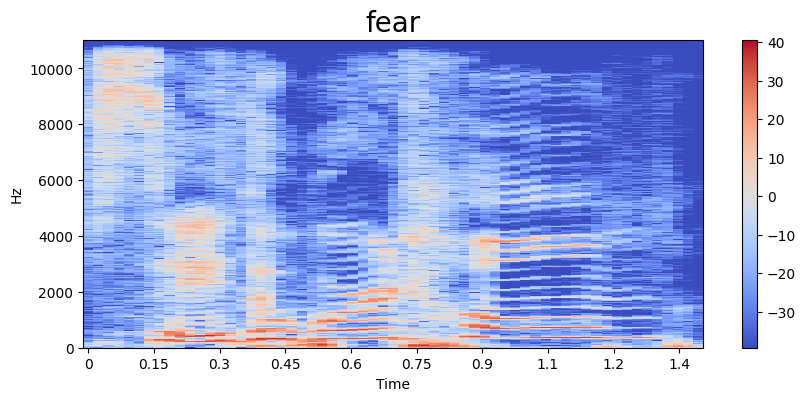

In [12]:
path=[]
labels=[]
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path.append(os.path.join(dirname, filename))
        label=filename.split('_')[-1]
        label=label.split('.')[0]
        labels.append(label.lower())
    print('dataset is loaded')
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb, sr=sr,x_axis='time', y_axis='hz')
    plt.colorbar()
df=pd.DataFrame()
df['speech']= path
df['label']= labels
df.head()
emotion = 'fear'
path = df['speech'][df['label']==emotion][0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

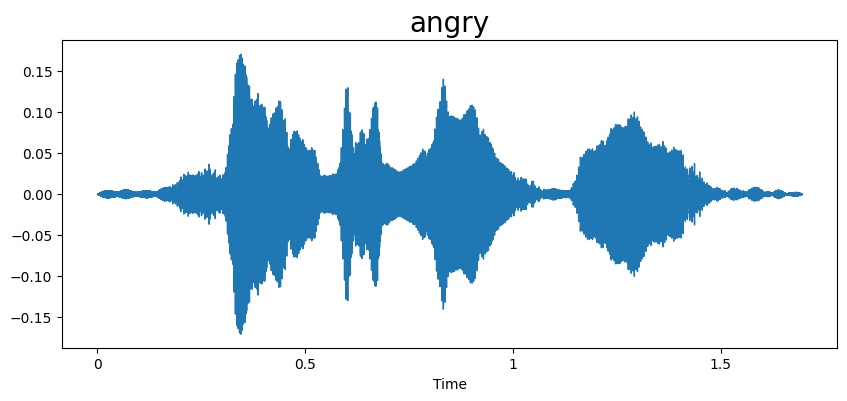

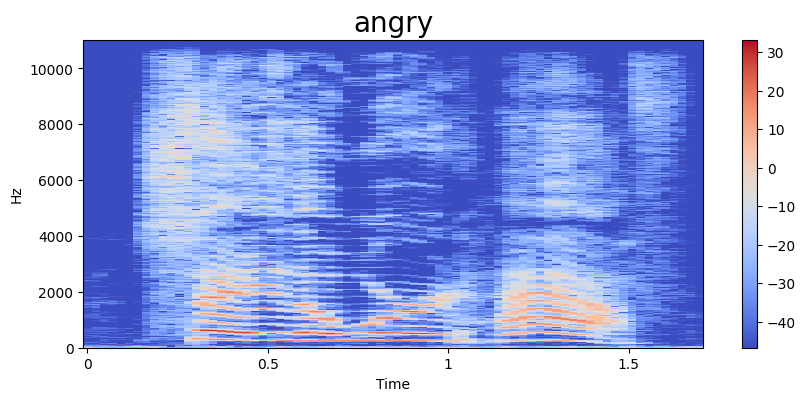

In [13]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

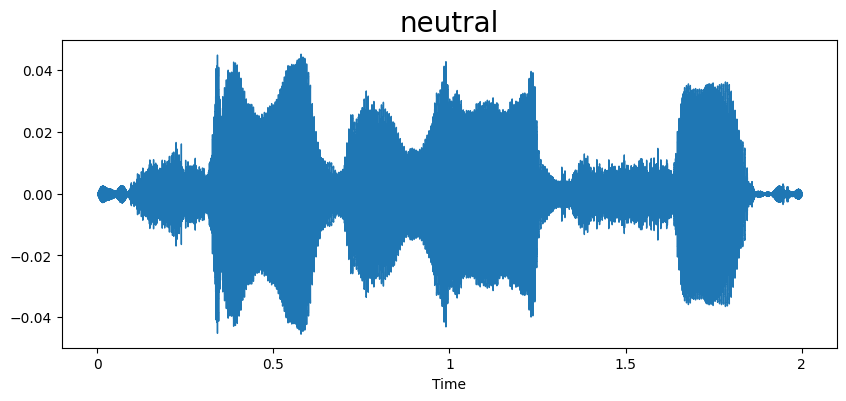

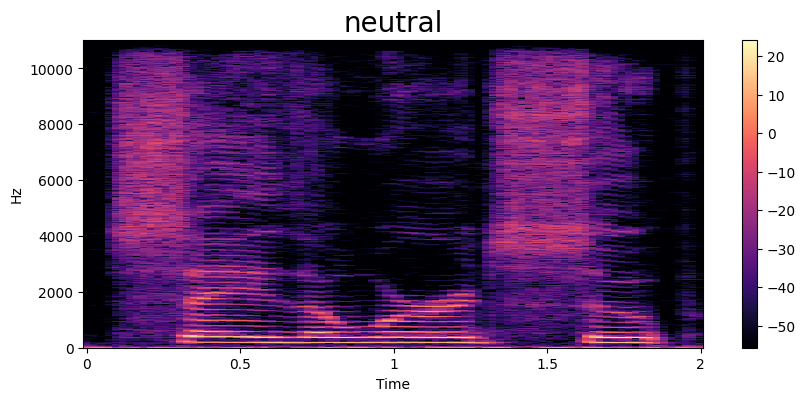

In [14]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

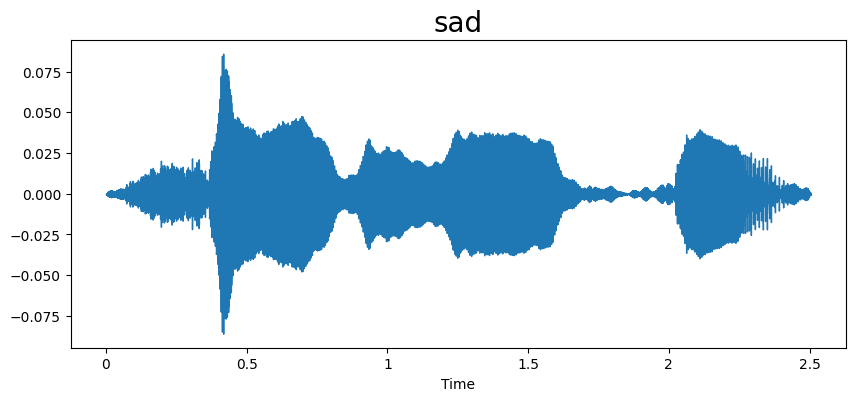

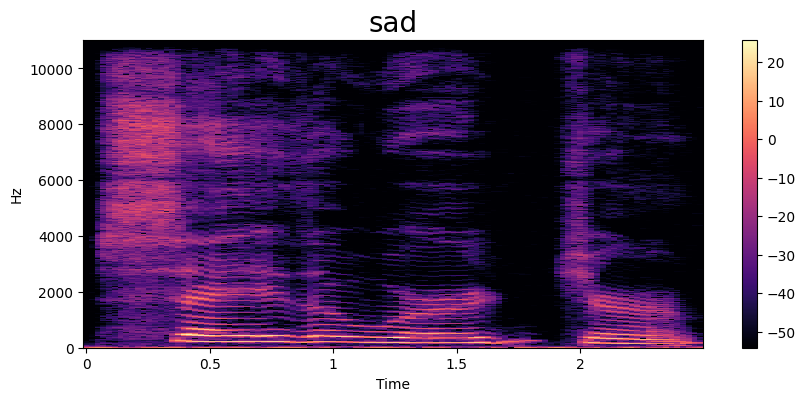

In [15]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

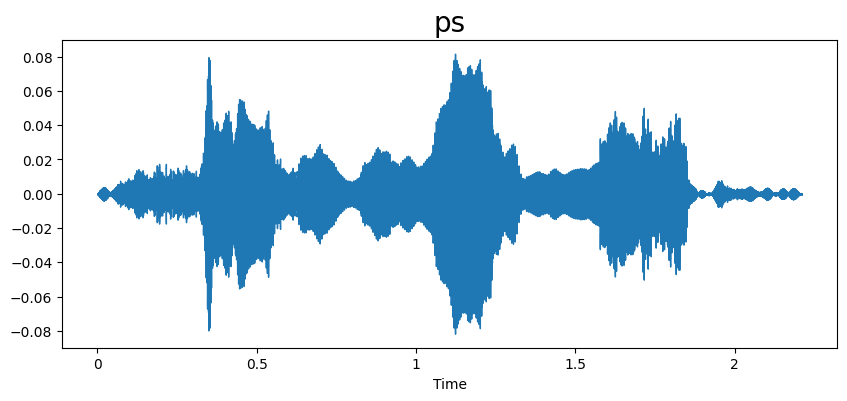

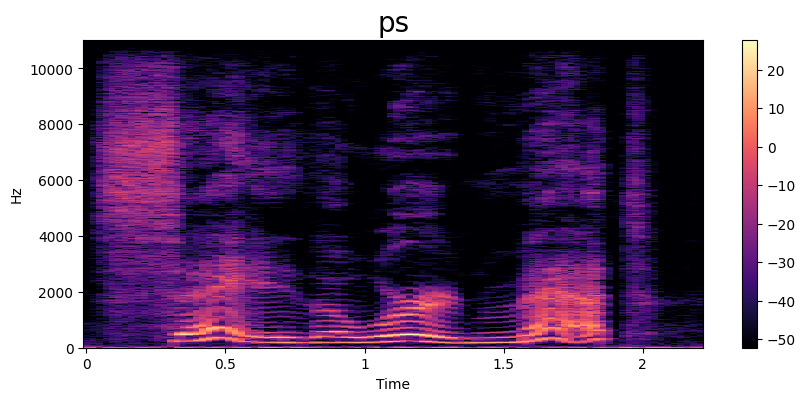

In [16]:
emotion = 'ps' 
# ps as pleasent surprise
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


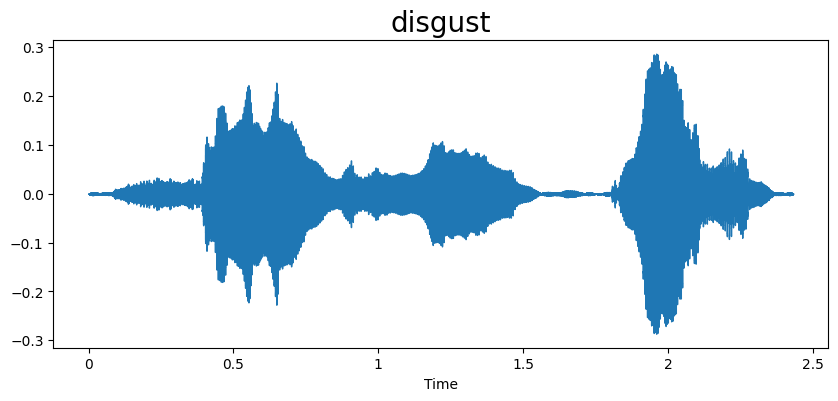

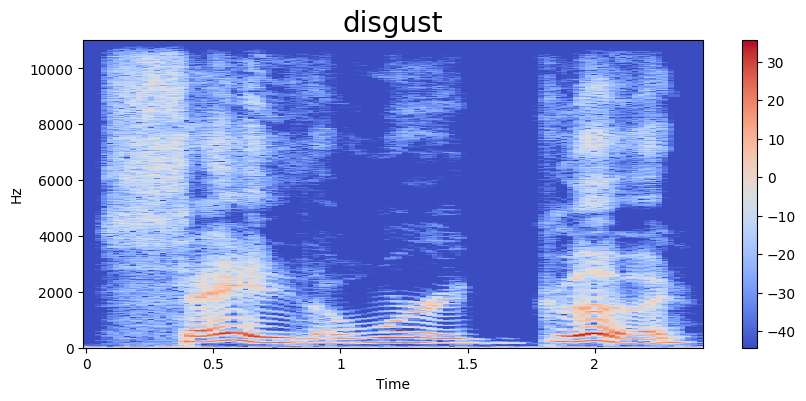

In [17]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

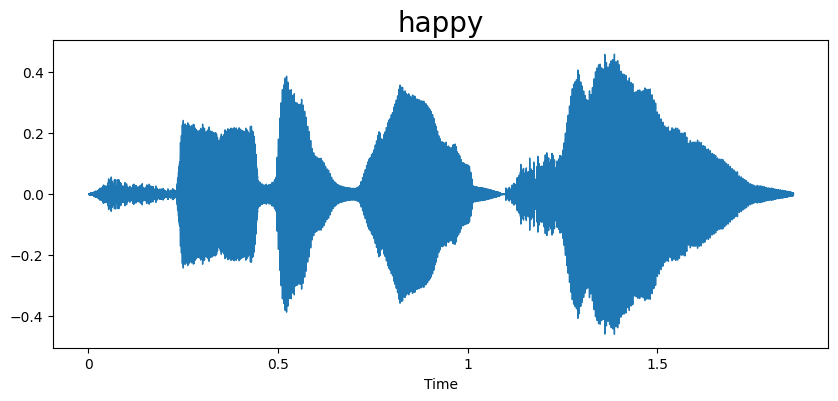

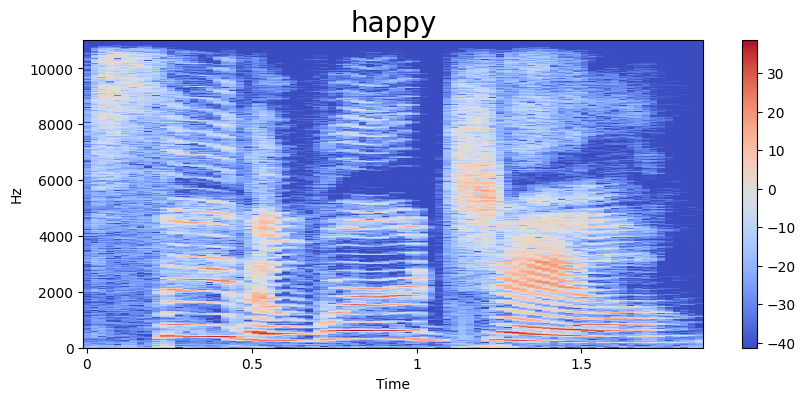

In [18]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**Feature Extraction**

In [19]:
def extract_mfcc(filename):
     y, sr = librosa.load(filename, duration=3, offset=0.5)
     mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
     return mfcc

In [20]:
extract_mfcc(df['speech'][0])

array([-285.73727   ,   85.78295   ,   -2.1689112 ,   22.125532  ,
        -14.757395  ,   11.051346  ,   12.412449  ,   -3.0002618 ,
          1.0844991 ,   11.078272  ,  -17.41966   ,   -8.093213  ,
          6.5879726 ,   -4.2209535 ,   -9.15508   ,    3.52148   ,
        -13.186381  ,   14.078853  ,   19.66973   ,   22.725618  ,
         32.57464   ,   16.325035  ,   -3.8427293 ,    0.89629656,
        -11.239262  ,    6.653462  ,   -2.5883696 ,   -7.7140164 ,
        -10.941658  ,   -2.4007547 ,   -5.281288  ,    4.271157  ,
        -11.202216  ,   -9.024621  ,   -3.6669848 ,    4.869744  ,
         -1.6027985 ,    2.5600514 ,   11.454374  ,   11.233449  ],
      dtype=float32)

In [21]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [22]:
X_mfcc

0       [-285.73727, 85.78295, -2.1689112, 22.125532, ...
1       [-348.34332, 35.193233, -3.841328, 14.658875, ...
2       [-340.11435, 53.796444, -14.267782, 20.884027,...
3       [-306.63422, 21.259708, -4.4110823, 6.4871554,...
4       [-344.7548, 46.329193, -24.171413, 19.392921, ...
                              ...                        
5595    [-374.3952, 60.864998, 0.025059083, 8.431058, ...
5596    [-313.96478, 39.847843, -5.6493053, -3.867575,...
5597    [-357.54886, 77.886055, -15.224756, 2.194633, ...
5598    [-353.1474, 101.68391, -14.175896, -12.037376,...
5599    [-389.4595, 54.042767, 1.346998, -1.4258983, -...
Name: speech, Length: 5600, dtype: object

In [23]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [24]:
## input split
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [25]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [26]:
y = y.toarray()


In [27]:
y.shape

(5600, 7)

**LSTM Model**

In [28]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

**Training the Model**

In [29]:
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)


Epoch 1/50
70/70 [==============================] - 16s 179ms/step - loss: 0.8403 - accuracy: 0.6904 - val_loss: 0.4387 - val_accuracy: 0.8589
Epoch 2/50
70/70 [==============================] - 12s 174ms/step - loss: 0.2409 - accuracy: 0.9257 - val_loss: 0.4353 - val_accuracy: 0.8607
Epoch 3/50
70/70 [==============================] - 12s 172ms/step - loss: 0.1547 - accuracy: 0.9529 - val_loss: 0.3040 - val_accuracy: 0.8946
Epoch 4/50
70/70 [==============================] - 12s 174ms/step - loss: 0.1095 - accuracy: 0.9674 - val_loss: 0.0510 - val_accuracy: 0.9830
Epoch 5/50
70/70 [==============================] - 12s 174ms/step - loss: 0.0855 - accuracy: 0.9719 - val_loss: 0.0735 - val_accuracy: 0.9768
Epoch 6/50
70/70 [==============================] - 12s 170ms/step - loss: 0.0961 - accuracy: 0.9712 - val_loss: 0.1591 - val_accuracy: 0.9509
Epoch 7/50
70/70 [==============================] - 12s 172ms/step - loss: 0.0723 - accuracy: 0.9777 - val_loss: 0.1423 - val_accuracy: 0.9545

**Plotting Result**

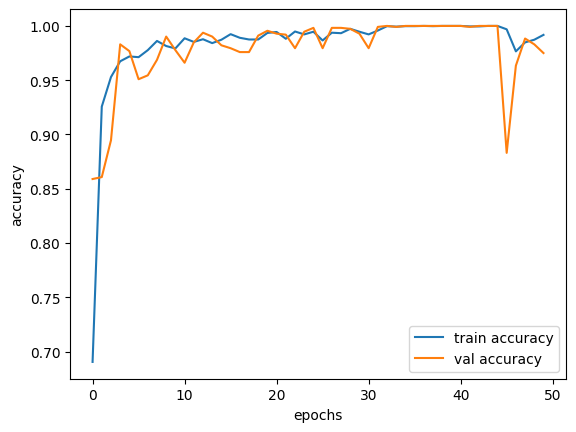

In [30]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

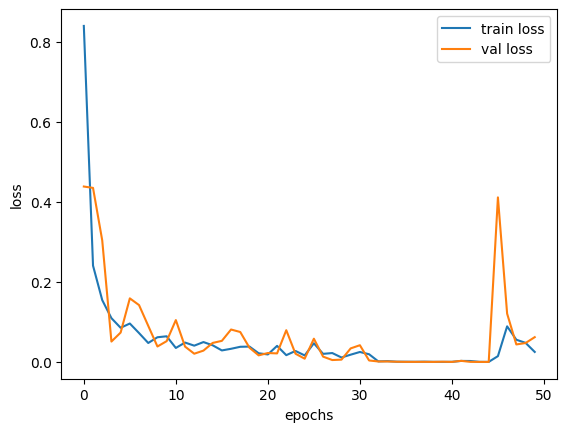

In [31]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()